<a href="https://colab.research.google.com/github/cleysonl/Pytorch/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN MNIST with PyTorch**

In [1]:
!pip install torch torchvision

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

## **Initializing GPU usage**

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## **Transformations**

In [6]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, ), (0.5, ))
                                 ])

training_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
validation_dataset = datasets.MNIST(root = './data', train = False, download = True, transform = transform)

#Loaders
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size = 100, shuffle = True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle = True)


0it [00:00, ?it/s]

9920512it [00:01, 8585553.19it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 129817.38it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2138299.28it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 51610.88it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


## **Numpy Image Conversion Function**

In [0]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy() 
  image = image.transpose(1,2,0) # (28,28,1)
  image = image[:,:,0]
  image = image.clip(0,1)
  return image

## **Plotting Image Data**

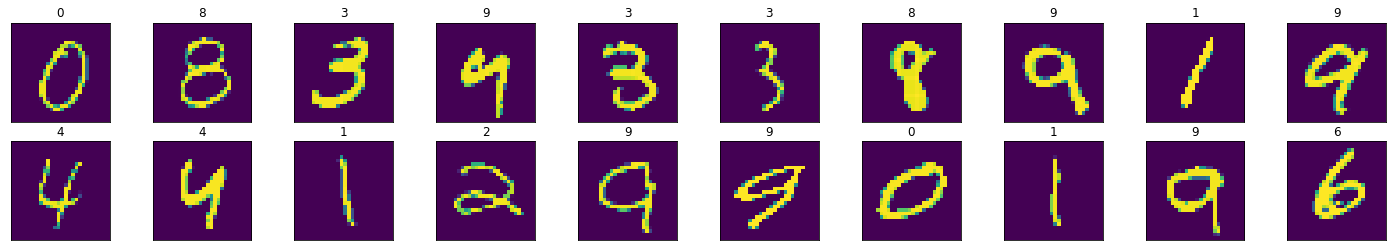

In [9]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(labels[idx].item())

## **Model Class Constructor**

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 20, 5, 1)
    self.conv2 = nn.Conv2d(20, 50, 5, 1)
    self.fc1 = nn.Linear(4*4*50, 500)
    self.dropout1 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(500,10)
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 4*4*50)
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x= self.fc2(x)
    return x